<h1><u><span style="color:#FF6666;">Stroke Patient Healthcare Using Deep Learning</span></u></h1>

The main objective of this project is to examine a healthcare dataset regarding the prediction of **strokes**. The dataset consists of patient details including demographic information, medical background, and lifestyle elements. Its goal is to forecast the probability of experiencing a stroke using different characteristics.

<h4><u>Dataset:</u></h4>

- **Gender and Age**: Basic demographic information.
- **Hypertension and Heart Disease**: Medical history related to stroke risk.
- **Ever Married**: Marital status, which might influence health outcomes.
- **Work Type and Residence Type**: Social factors that could affect health.
- **Avg Glucose Level and BMI**: Indicators of health related to metabolic conditions.
- **Smoking Status**: Lifestyle factor contributing to stroke risk.
- **Stroke**: The target variable indicating whether a stroke has occurred (1) or not (0).

**Dataset Link**: [Click here to access the dataset](https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link)


># **(1) Defining Problem Statement and Analyzing Basic Metrics**
***

The objective of this project is to analyze a healthcare dataset related to **stroke** patients, focusing on identifying key risk factors that contribute to stroke occurrences. This includes analyzing metrics such as age, hypertension, heart disease, BMI, glucose levels, and lifestyle factors like smoking habits. By examining these variables, we aim to uncover patterns that can aid in early diagnosis and stroke prevention. The analysis will provide insights into the prevalence of strokes across different demographics and conditions, helping to better understand the contributing factors.

# **(2) Import libraries and Load the dataset**
***

In [359]:
import numpy as np  # Importing NumPy 
import pandas as pd  # Importing Pandas 


In [360]:
# Load .csv dataset into a pandas dataFrame
df=pd.read_csv("https://drive.google.com/uc?export=download&id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c")

In [361]:
# shows the top 5 records of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **(3) Data Exploration and Pre-processing**
***

### **Check basic metrics and data types**

Comprehending the format of the dataset, such as the quantity of rows and columns, and the data types of every attribute. Exploring data is an essential step.

In [362]:
df.shape  # Returns a tuple representing the number of rows and columns in the DataFrame

(5110, 12)

In [363]:
df.info()  # Provides a summary of the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<h5 style="color:#457b9d;">Observations:</h5>


- **Dataset Size**: 5,110 entries and 12 columns.
- **Data Types**:
  - 4 integer columns
  - 3 float columns
  - 5 object columns
- **Missing Values**: The **BMI** column has 101 missing values; all other columns are complete with no missing data.
- **Attributes**:
  - Demographic information: **gender**, **age**, **ever_married**, **work_type**, **Residence_type**
  - Health-related factors: **hypertension**, **heart_disease**, **avg_glucose_level**, **bmi**, **smoking_status**, **stroke**
- **Analysis Potential**: The dataset is suitable for exploring relationships between demographic factors and stroke incidence.


In [364]:
 #Describing the statistical summary of numerical type data
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<h5 style="color:#457b9d;">Observations:</h5>

-  **Age Distribution**: The average age of participants is approximately **43.23 years**, with a wide range from **0.08** to **82 years**, indicating a diverse age group.
  
- **Hypertension and Heart Disease**: About **9.75%** of participants have hypertension, and approximately **5.4%** have a history of heart disease, reflecting relatively low prevalence rates.

- **Average Glucose Level**: The mean average glucose level is **106.15 mg/dL**, with a maximum value of **271.74 mg/dL**, suggesting variability in glucose levels among participants.

- **Body Mass Index (BMI)**: The mean BMI is **28.89 kg/m²**, indicating that many participants may fall into the overweight category; the BMI column has **201 missing values**.

- **Stroke Incidence**: Only about **4.87%** of participants have experienced a stroke, suggesting that stroke occurrences are relatively infrequent in this dataset.



In [365]:
df.smoking_status.unique()  # Retrieve the unique values in the 'smoking_status' column to analyze different smoking behaviors in the dataset.

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### **Statistical Summary of categorical type data**

In [366]:
# Statistical summary of categorical type data
df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


<h5 style="color: #457b9d;">Observations:</h5>

- **Gender**: There are **3 unique categories** with **Female** being the most frequent (2,994 occurrences), indicating a higher representation of females in the dataset.

- **Marital Status**: The majority of participants are **ever married** (3,353 occurrences), suggesting that most individuals in the dataset have been married at some point.

- **Work Type**: There are **5 unique work types**, with **Private** employment being the most common (2,925 occurrences), indicating that many participants work in the private sector.

- **Residence Type**: The dataset includes **2 types** of residence, with **Urban** being more prevalent (2,596 occurrences), highlighting a tendency for participants to live in urban areas.

- **Smoking Status**: There are **4 unique smoking status categories**, with **never smoked** being the most common (1,892 occurrences), indicating a relatively low prevalence of smoking among participants.

<h3 style="text-decoration: underline;">Checking null values</h3>



This step serves as both **data cleaning** and **data preprocessing**. Identifying and managing missing values is an essential part of data cleaning, as it addresses the issue of incomplete data. Depending on the severity of the missing data, you may need to choose a method for handling it, such as imputing values or removing the affected rows or columns. 

Additionally, this step is crucial for data preprocessing because the presence of missing values can affect the reliability of subsequent analyses. Addressing these gaps ensures that the data is in an appropriate format for effective analysis.

In [367]:
# Display the count of missing values for each column
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [368]:
# Calculate the missing values percentage for each column and round to two decimal places
missing_values_percentage = (df.isnull().mean() * 100).round(2)

# Display the missing values percentage for each column
print("Missing Values Percentage:\n")
print(missing_values_percentage)

Missing Values Percentage:

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  3.93
smoking_status       0.00
stroke               0.00
dtype: float64


<h5 style="color: #457b9d;">Observations:</h5>

- The dataset is largely complete, with most columns showing **0% missing data**.
- The **'bmi'** column is the only one with missing values, accounting for **3.93%** of the entries.
- Key columns like **'id'**, **'gender'**, **'age'**, **'hypertension'**, **'heart_disease'**, **'ever_married'**,
  **'work_type'**, **'Residence_type'**, **'avg_glucose_level'**, **'smoking_status'**, and **'stroke'** have **no missing data**.


<h3 style="text-decoration: underline;">Handling null values</h3>



In [369]:
# Handling missing values for the 'bmi' column by assigning the result back
# df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [370]:
# Display the count of missing values for each column
#df.isnull().sum()

In [371]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h5 style="color: #457b9d;">Observations:</h5>

- The dataset is complete with no missing values across all columns.

# **(4)  Data Visualization**
***

Data visualization is a crucial part of the deep learning workflow, as it helps researchers and practitioners understand data patterns, evaluate model performance, and gain insights into how models make predictions. By visualizing data, we can:

- **Understand Data Distribution**: Detect trends, patterns, and outliers that may impact model training.
- **Monitor Training Progress**: Visualize metrics like loss and accuracy over epochs to ensure the model is learning as expected.
- **Interpret Model Predictions**: Use techniques like heatmaps and Grad-CAM (Gradient-weighted Class Activation Mapping) to understand which parts of the input data the model focuses on.

In deep learning, common tools for data visualization include:
- **Matplotlib** and **Seaborn** for plotting graphs and charts.
- **TensorBoard** for visualizing model metrics, embeddings, and more during training.

Effective data visualization enables us to make informed decisions, debug issues, and enhance model interpretability.


<h3 style="text-decoration: underline;">Importing Matplotlib & Seaborn</h3>

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

- Pyplot is a sub-module for visualization in matplotlib.
- Seaborn is another visualization library which uses Matplotlib in the backend for plotting.

<u>**Categorical columns** </u> 
- gender: (e.g., Male, Female)
- hypertension: (0 = No, 1 = Yes)
- heart_disease: (0 = No, 1 = Yes)
- ever_married: (Yes, No)
- work_type: (e.g., Private, Self-employed)
- Residence_type: (Urban, Rural)
- smoking_status: (e.g., formerly smoked, never smoked, smokes)
- stroke: (0 = No, 1 = Yes)

 <h3><span style="color: #457b9d;">(Q1) How does age distribution relate to the incidence of stroke?</span></h3>

<u>*Introduction to histplot*</u> : The histplot function in Seaborn is used to visualize the distribution of a single numerical variable, often with the option to overlay different groups for comparison. By stacking and coloring the bars based on categories (such as stroke incidence in this case), we can observe how the variable's distribution differs between groups. The kde=True option adds a smooth curve representing the estimated probability density, helping to better visualize the data's underlying distribution.

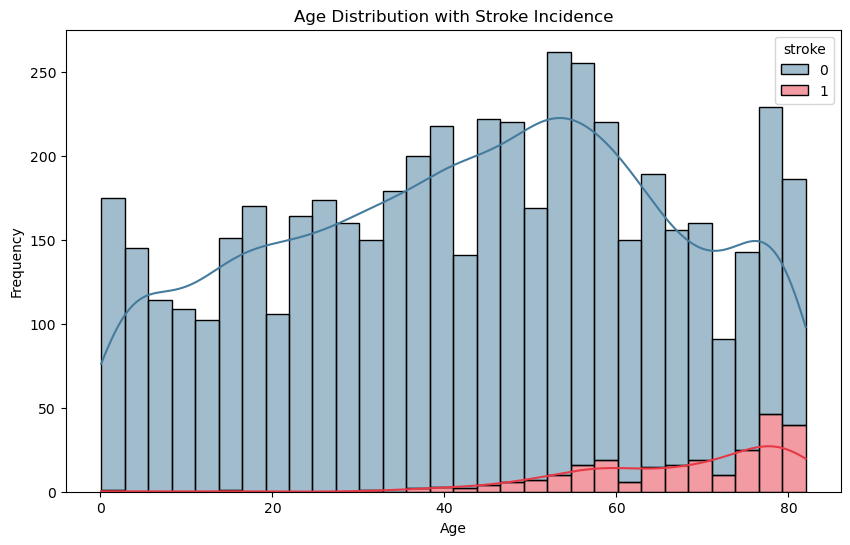

In [373]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#e63946"]  
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', kde=True, bins=30, palette=custom_palette)  
plt.title('Age Distribution with Stroke Incidence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h4><span style="color: #e63946";">Observations</span></h4>

- The plot shows a higher concentration of stroke cases among older individuals.
- This suggests that age is a significant factor in stroke risk, with older adults being more susceptible.

 <h3><span style="color: #457b9d;">(Q2) Does the risk of stroke rise with heart disease or hypertension?</span></h3>

<u>*Introduction to countplot*</u> : The countplot function in Seaborn is used to display the frequency counts of categorical data. It shows how many times each category occurs in the dataset, with the option to split the data by a secondary categorical variable using hue, which can reveal distribution patterns between different groups. This makes it useful for visualizing comparisons, such as the incidence of stroke across different genders or conditions.

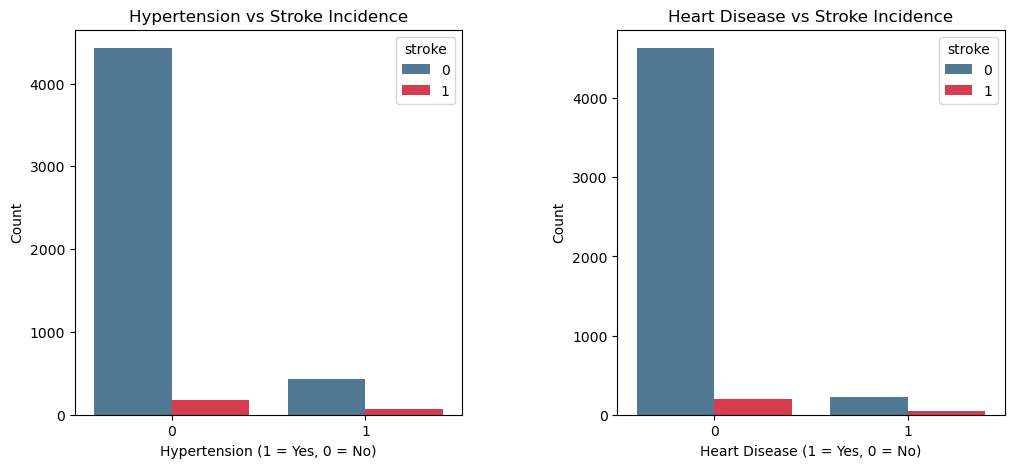

In [374]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

custom_palette = ["#457b9d", "#ef233c"]

# First subplot for Hypertension vs Stroke Incidence
sns.countplot(data=df, x='hypertension', hue='stroke', palette=custom_palette, ax=axes[0])
axes[0].set_title('Hypertension vs Stroke Incidence')
axes[0].set_xlabel('Hypertension (1 = Yes, 0 = No)')
axes[0].set_ylabel('Count')

# Second subplot for Heart Disease vs Stroke Incidence
sns.countplot(data=df, x='heart_disease', hue='stroke', palette=custom_palette, ax=axes[1])
axes[1].set_title('Heart Disease vs Stroke Incidence')
axes[1].set_xlabel('Heart Disease (1 = Yes, 0 = No)')
axes[1].set_ylabel('Count')

plt.subplots_adjust(wspace=0.4)  # Adjust wspace to control the space between plots
plt.show()

<h4><span style="color: #e63946";">Observations</span></h4>

 - People with hypertension have a noticeably higher count of strokes than those without.
 - There is an increased incidence of stroke among individuals with heart disease, suggesting it could be a significant risk factor.

 <h3><span style="color: #457b9d;">(Q3) How does average glucose level vary between individuals who had a stroke and those who didn’t?</span></h3>

<u>*Introduction to kdeplot*</u> : The kdeplot function in Seaborn is used to visualize the probability density function (PDF) of a continuous variable. By creating a smooth curve over the data, it helps to show the distribution shape and any potential peaks or patterns. Adding the hue parameter enables comparison between groups, and fill=True can add a shaded area under the curve for clearer visualization. This is particularly useful for understanding distributions, such as the average glucose level among individuals with or without stroke.

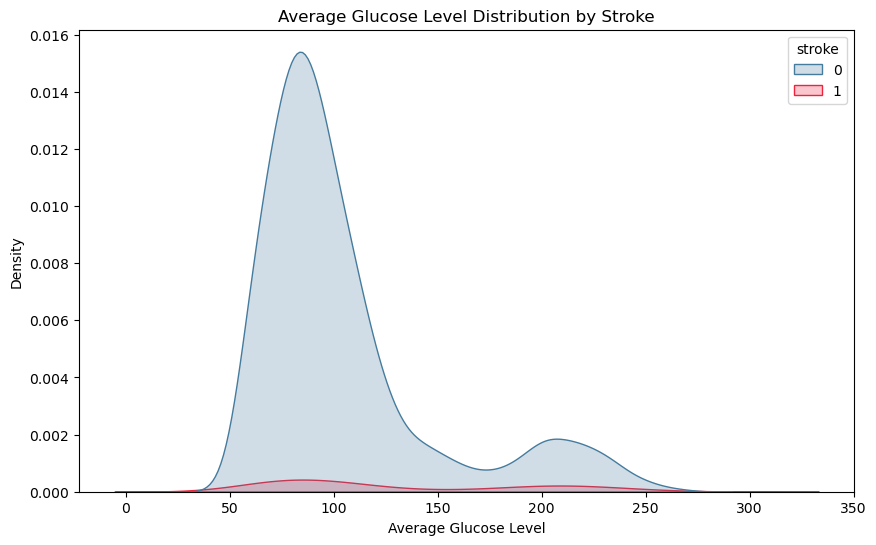

In [375]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, palette=custom_palette)
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()



<h4><span style="color: #e63946";">Observations</span></h4>
  
  - Individuals with higher average glucose levels seem more likely to have a stroke, potentially indicating a link with blood sugar levels.


<h3><span style="color: #457b9d;">(Q4) What is the relationship between BMI and stroke occurrence?</span></h3>

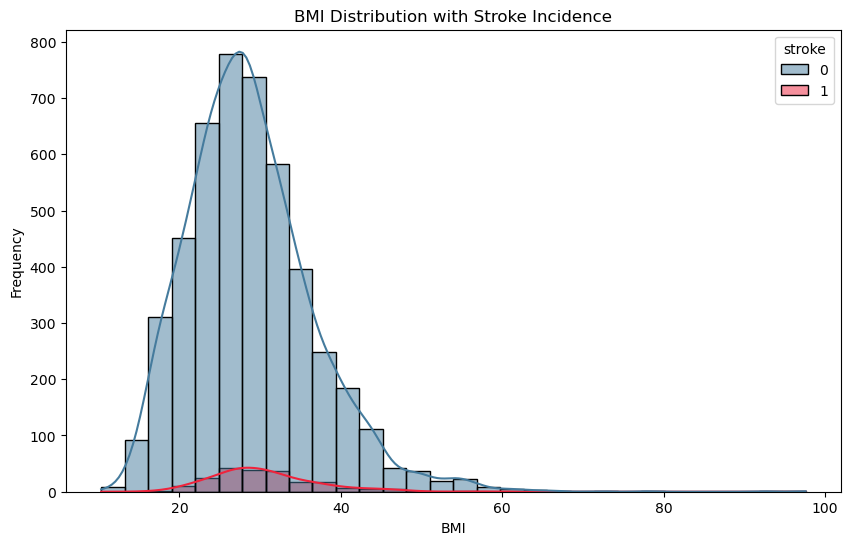

In [376]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30, palette=custom_palette)
plt.title('BMI Distribution with Stroke Incidence')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

<h4><span style="color: #e63946";">Observations</span></h4>

- Higher BMI levels show some association with stroke occurrence, though the effect is less pronounced than other factors.

 <h3><span style="color: #457b9d;">(Q5) What impact does gender have on the occurrence of strokes in individuals?</span></h3>

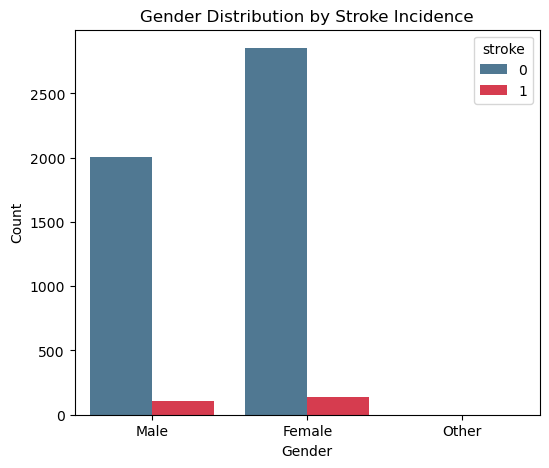

In [377]:
plt.figure(figsize=(6, 5))
custom_palette = ["#457b9d", "#ef233c"]
sns.countplot(data=df, x='gender', hue='stroke', palette=custom_palette)
plt.title("Gender Distribution by Stroke Incidence")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<h4><span style="color: #e63946";">Observations</span></h4>
 
- The distribution shows that both male and female individuals experience strokes, but the overall count of strokes in each gender category appears relatively balanced.
- While the exact difference may vary slightly, there doesn’t seem to be a strong gender bias in stroke incidence based on this dataset.


 <h3><span style="color: #457b9d;">(Q6) Is there a clear correlation between age and the likelihood of stroke among different smoking statuses? </span></h3>

<u>*Introduction to boxplot*</u> : The boxplot function in Seaborn is used to visualize the distribution of a continuous variable across categories, highlighting key summary statistics. The box represents the interquartile range (IQR), while the line inside shows the median. Whiskers extend to show the range of the data, with outliers plotted individually. Box plots are useful for comparing distributions across categories, like BMI or age across stroke and non-stroke groups, to identify variations and outliers.

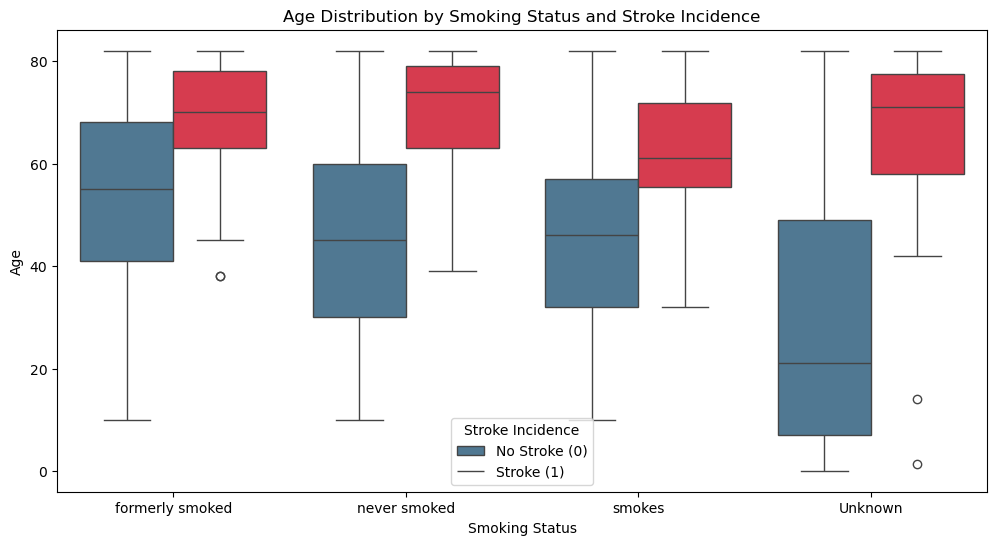

In [378]:
plt.figure(figsize=(12, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.boxplot(data=df, x="smoking_status", y="age", hue="stroke", palette=custom_palette)

plt.title("Age Distribution by Smoking Status and Stroke Incidence")
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.legend(title='Stroke Incidence', labels=['No Stroke (0)', 'Stroke (1)'])
plt.show()

<h4><span style="color: #e63946";">Observations</span></h4>

- Older Age and Stroke: Stroke cases are more common in older age groups across all smoking statuses.
- Former Smokers: Individuals who "formerly smoked" tend to be older, and within this group, there is a higher proportion of stroke cases.
- Never Smoked Group: People who "never smoked" are generally younger, with fewer stroke cases, possibly due to lower average age.
- General Insight: Age appears to be a stronger factor in stroke incidence than smoking status alone.

 <h3><span style="color: #457b9d;">(Q7) Is there a relationship between age and BMI, and does it differ by stroke incidence ?</span></h3>

<u>*Introduction to scatterplot*</u> : The scatterplot function in Seaborn is ideal for visualizing the relationship between two continuous variables. Each point represents an observation in the dataset, plotted by its values on the x and y axes. Using hue, we can color points based on a categorical variable, revealing trends or clustering patterns between groups.

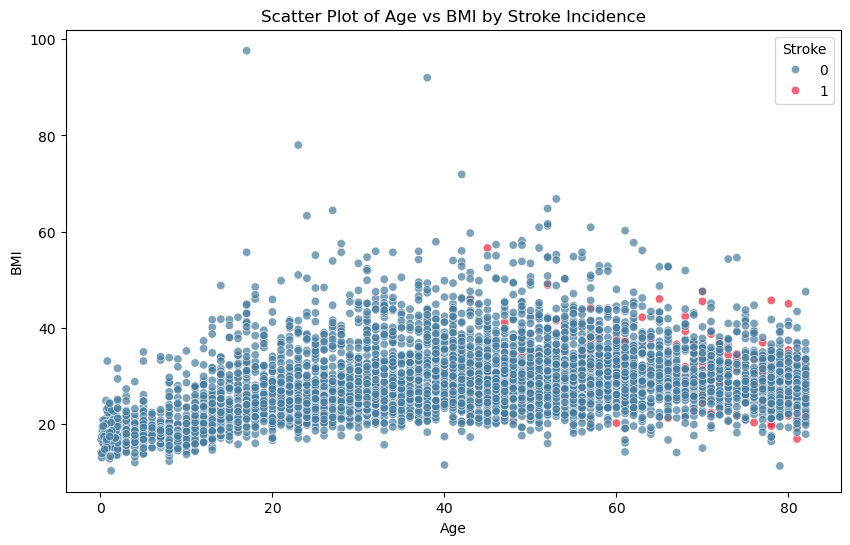

In [379]:
plt.figure(figsize=(10, 6))
custom_palette = ["#457b9d", "#ef233c"]
sns.scatterplot(data=df, x="age", y="bmi", hue="stroke", palette=custom_palette, alpha=0.7)
plt.title("Scatter Plot of Age vs BMI by Stroke Incidence")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Stroke")
plt.show()

<h4><span style="color: #e63946";">Observations</span></h4>

- Stroke cases are more common in older age groups, suggesting age as a potential risk factor.
- There is no clear pattern indicating that higher BMI alone is associated with a higher stroke incidence.
- Stroke cases tend to cluster in older adults, indicating age combined with other factors could increase stroke risk.

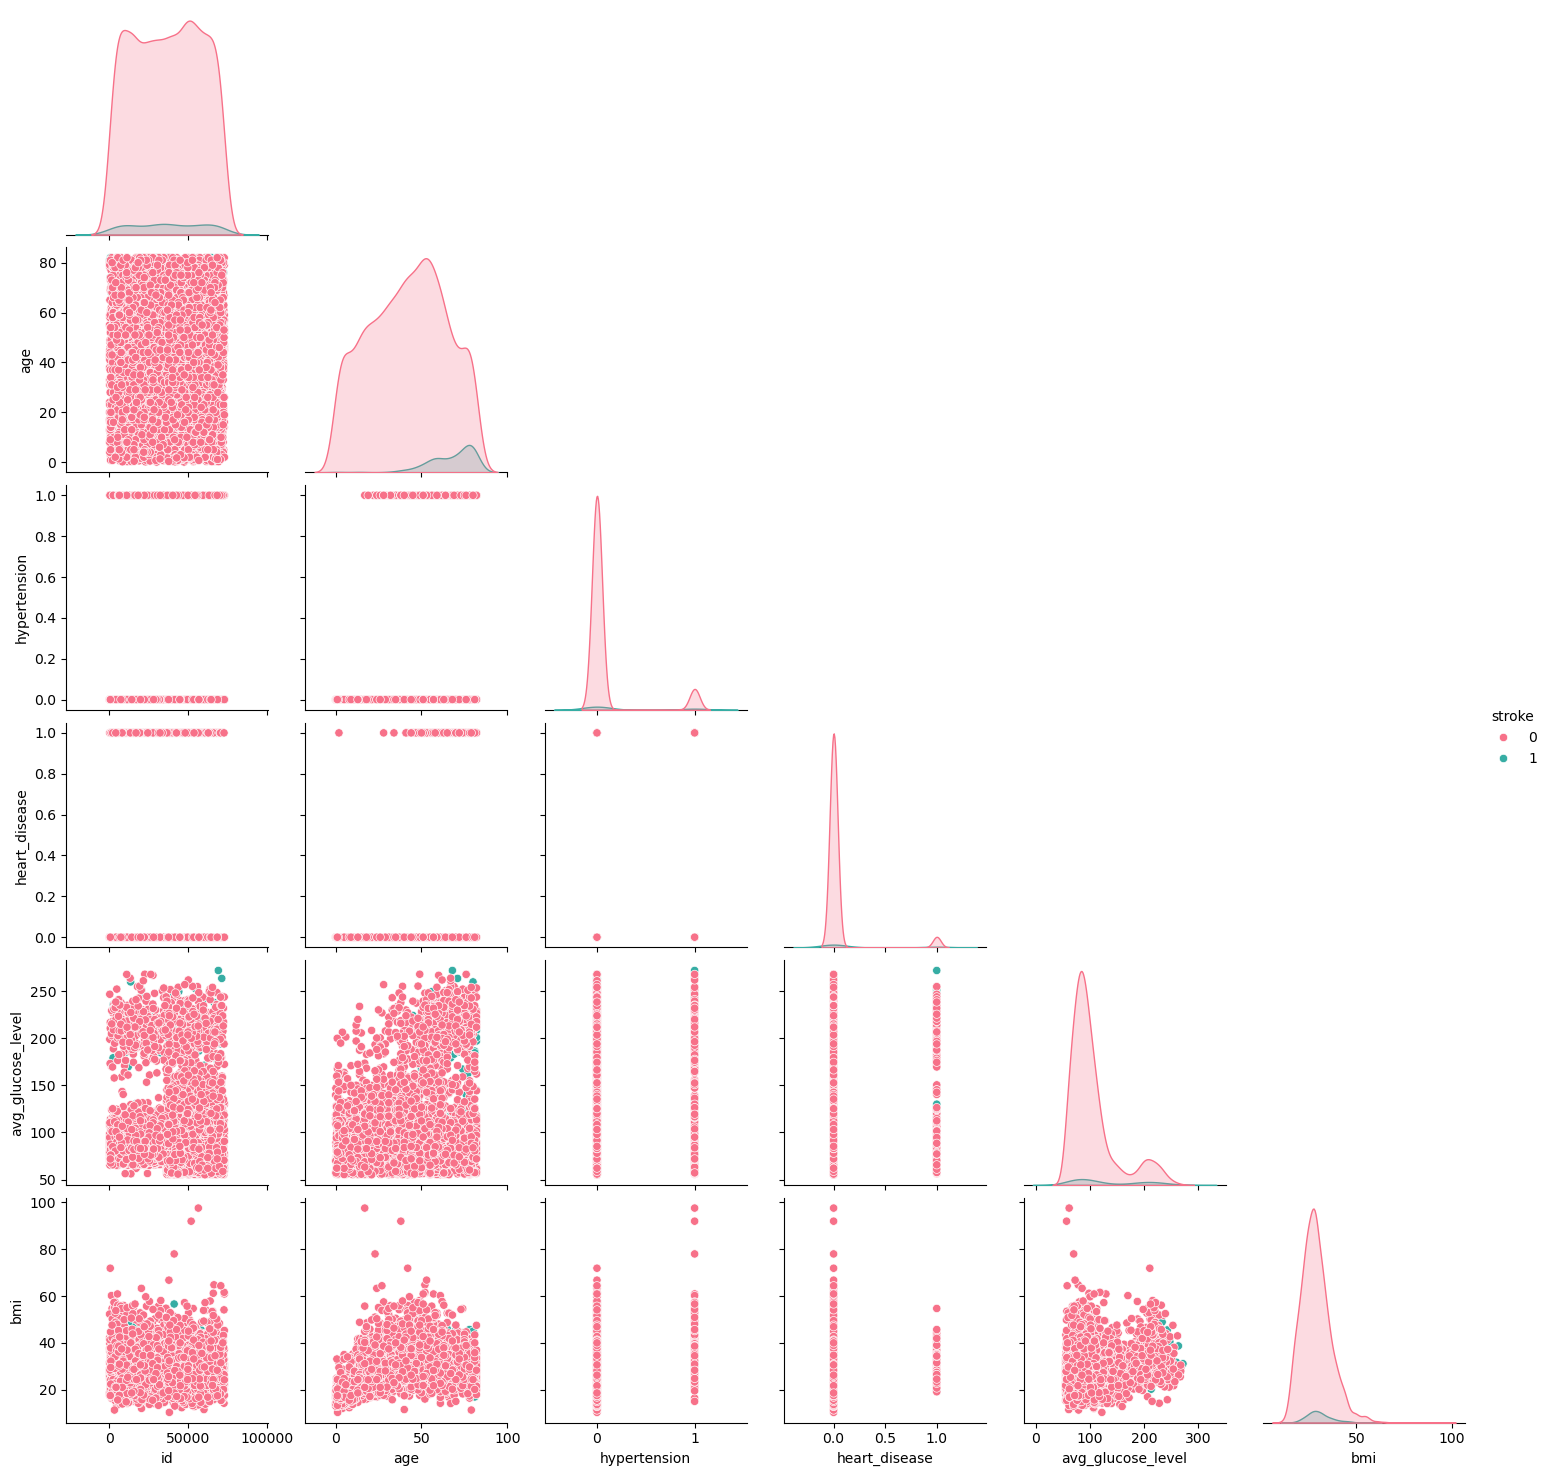

In [380]:
# Pairplot for Multiple Variables
sns.pairplot(df, hue="stroke", palette="husl", corner=True)
plt.show()

 <h3><span style="color: #457b9d;">(Q8) What does the correlation heatmap reveal about the connections among numeric variables in the healthcare dataset, and how can these moderate associations inform our understanding of health indicators?</span></h3>

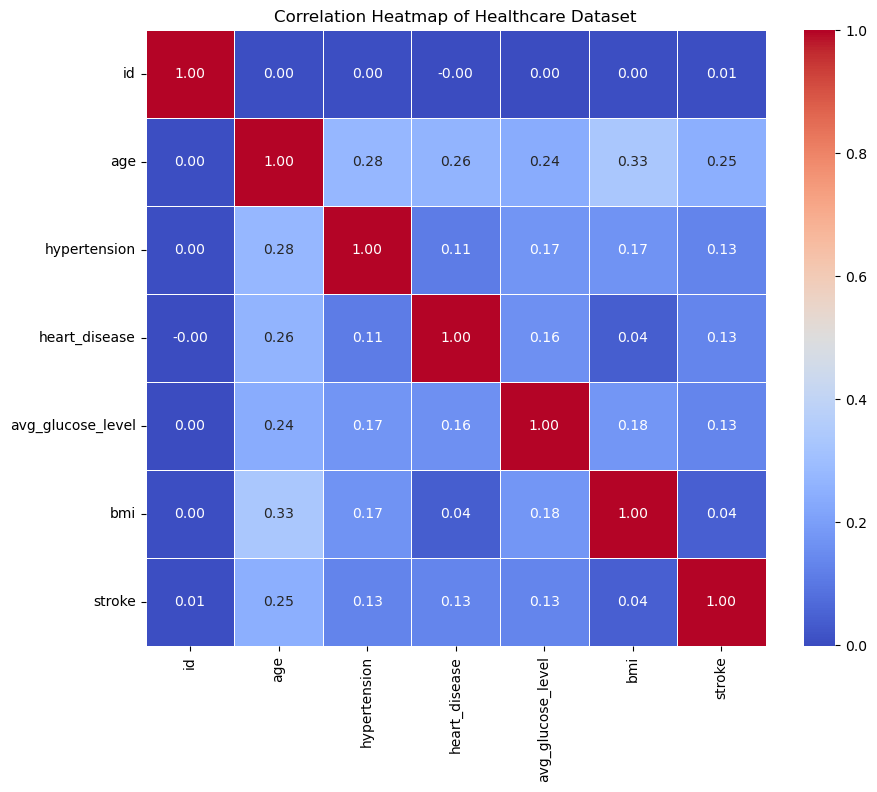

In [381]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Healthcare Dataset")
plt.show()

<h4><span style="color: #e63946";">Observations</span></h4>

- The heatmap shows a moderate association between age and stroke risk.
- Hypertension and heart disease are positively correlated.
- Higher average glucose levels moderately correlate with increased stroke risk.
- BMI shows weak correlations, suggesting limited linear relationships with other factors in this dataset.



<h2><u> Data Encoding </u></h2>

Data encoding is the process of converting **categorical data** into **numerical formats** so that machine learning algorithms can interpret it. This is essential for handling non-numeric variables, such as categorical columns, by encoding them into binary or ordinal formats that algorithms can process directly, improving model performance and accuracy.

 <h4><span style="color: #457b9d;">1. Convert Residence_type column to Rural/Urban col (0 = rural, 1 =urban)</span></h4>

In [382]:
# Convert Residence_type to binary (0 = Rural, 1 = Urban)
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
print("After converting Residence_type to binary (0 = Rural, 1 = Urban):")
display(df[['Residence_type']].head())

After converting Residence_type to binary (0 = Rural, 1 = Urban):


,Residence_type
0,1
1,0
2,0
3,1
4,0


 <h4><span style="color: #457b9d;">2. Convert work_type column to 3 or 4 different columns (Never_worked,Private,Self-employed) </span></h4>

In [383]:
# Convert work_type to separate binary columns for specific categories
work_type_dummies = pd.get_dummies(df['work_type'], prefix='work_type')
df = pd.concat([df, work_type_dummies[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']]], axis=1)

# Display the first few rows to verify the transformation
print("\nAfter converting work_type to binary columns:")
print(df[['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']].head())

# Ensure all binary columns contain only 0 or 1
work_type_columns = ['work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']
for col in work_type_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 1 else 0)

print("\nAfter ensuring binary columns contain only 0 or 1:")
print(df[work_type_columns].head())



After converting work_type to binary columns:
   work_type_Never_worked  work_type_Private  work_type_Self-employed
0                   False               True                    False
1                   False              False                     True
2                   False               True                    False
3                   False               True                    False
4                   False              False                     True

After ensuring binary columns contain only 0 or 1:
   work_type_Never_worked  work_type_Private  work_type_Self-employed
0                       0                  1                        0
1                       0                  0                        1
2                       0                  1                        0
3                       0                  1                        0
4                       0                  0                        1


 <h4><span style="color: #457b9d;">3. Convert smoking_status columns to 3 or 4 different columns </span></h4>

In [384]:
# Convert smoking_status to binary columns
smoking_status_dummies = pd.get_dummies(df['smoking_status'], prefix='smoking_status')
df = pd.concat([df, smoking_status_dummies[['smoking_status_never smoked', 'smoking_status_formerly smoked', 'smoking_status_smokes']]], axis=1)

# Display the first few rows to verify the transformation
print("\nAfter converting smoking_status to binary columns:")
print(df[['smoking_status_never smoked', 'smoking_status_formerly smoked', 'smoking_status_smokes']].head())

# Ensure that all binary columns contain only 0 or 1
binary_columns = ['smoking_status_never smoked', 'smoking_status_formerly smoked', 'smoking_status_smokes']
for col in binary_columns:
    df[col] = df[col].apply(lambda x: 1 if x == 1 else 0)

print("\nAfter ensuring binary columns contain only 0 or 1:")
print(df[binary_columns].head())



After converting smoking_status to binary columns:
   smoking_status_never smoked  smoking_status_formerly smoked  \
0                        False                            True   
1                         True                           False   
2                         True                           False   
3                        False                           False   
4                         True                           False   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                   True  
4                  False  

After ensuring binary columns contain only 0 or 1:
   smoking_status_never smoked  smoking_status_formerly smoked  \
0                            0                               1   
1                            1                               0   
2                            1                               0   
3                            0                               0   
4      

 <h4><span style="color: #457b9d;">4. Create a new variable to store the dataset for data model, and drop the Residence_type, work_type and smoking_status columns.</span></h4>

In [385]:
# Drop the original 'Residence_type', 'work_type', and 'smoking_status' columns
df_model = df.drop(columns=['Residence_type', 'work_type', 'smoking_status'])
print("\nFinal transformed dataset for data modeling:")
display(df_model.head())  


Final transformed dataset for data modeling:


,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_formerly smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,228.69,36.6,1,0,1,0,0,1,0
1,51676,Female,61.0,0,0,Yes,202.21,NaN,1,0,0,1,1,0,0
2,31112,Male,80.0,0,1,Yes,105.92,32.5,1,0,1,0,1,0,0
3,60182,Female,49.0,0,0,Yes,171.23,34.4,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,174.12,24.0,1,0,0,1,1,0,0


# **(5)  Building a High-Accuracy Machine Learning Model for Stroke Prediction**
***

We aim to build and evaluate multiple regression models, including Linear Regression, Lasso Regression, and Ridge Regression, to predict the likelihood of a stroke. By calculating metrics such as Root Mean Squared Error (RMSE) and comparing model performance, the best approach for achieving high prediction accuracy is identified.

<div style="text-align: center;">
    <h3 style="color: #457b9d;">
         <b><u>Ridge Regression Model: Training, Testing, and Evaluation</u></b>
    </h3>




<div style="border: 2px solid #457b9d; padding: 10px; border-radius: 10px; box-sizing: border-box;">
    <h6 style="font-size: 16px;">
        <b><u>Introduction</u></b><br><br>
        Ridge Regression is a fundamental statistical method and widely used algorithm for predicting continuous outcomes. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal of ridge regression is to find the best-fit line that minimizes the sum of squared differences between the predicted values and the actual values, while also adding a penalty for the size of the coefficients to prevent overfitting. This method is particularly useful when there is multicollinearity between input features.
        In the modeling process, we train the ridge regression model using a labeled training dataset and evaluate its performance on unseen test data. Effectiveness is commonly assessed using performance metrics like Root Mean Squared Error (RMSE) or R-squared (R²). RMSE measures how close the model's predictions are to the actual values, providing insights into its accuracy and ability to generalize to new data.
<br><br>
        The steps involved in this process are:<br>
        1.<b>Preprocess the data</b> (handle missing values, scale features if needed).<br>
        2.<b>Train a Ridge Regression model on the training data.</b><br>
        3.<b> Evaluate the model's performance using metrics like RMSE or R².</b><br><br>
        
    
</div>





 ##### <b><u>Mathematical Representation</u></b>
In a Ridge Regression model, the relationship between the dependent variable y and the independent variables  x1,x2,x3....xp is also assumed to be linear, similar to linear regression. However, Ridge Regression introduces a regularization term to prevent overfitting by penalizing large coefficients, which helps improve the model's generalization.

The model can be expressed mathematically as:






![Alt Text](eqr.png)

where ,
  - yi: Actual value of the target variable for the ith observation
  - yi^: Predicted value for the ith observation
  - n: Number of observations
  - p: Number of features
  - Bj: Coeficient for each feature
  - sigma(yi-yi^)^2: Residual sum of squares
  - sigma Bj^2: Penalty term

<b>Root Mean Squared Error (RMSE):</b>
RMSE is a commonly used metric to evaluate the accuracy of a regression model. It measures the average magnitude of the error between predicted values and actual values.

![Alt Text](eq4.png)

where,

- n: is the number of data points
- yi: is the actual value for the i-th data point
- yi^: is the predicted value for the i-th data point.

<h5><span style="color: #457b9d;">Encoding all columns in dataset:</span></h5>

In [386]:

for column in df.columns:
    # Ensure the column is a Series and has a dtype
    if isinstance(df[column], pd.Series):
        # Check if column has object type (usually represents strings or categorical data)
        if df[column].dtype == 'object':
            # If it has only two unique values, use binary encoding
            if df[column].nunique() == 2:
                # Map the values directly to 0 and 1
                df[column] = df[column].map({df[column].unique()[0]: 1, df[column].unique()[1]: 0})
            # If it has more than two unique values, use one-hot encoding
            else:
                df = pd.get_dummies(df, columns=[column], drop_first=True)
        # If column is boolean (True/False), convert to 0/1
        elif df[column].dtype == bool:
            df[column] = df[column].astype(int)

# Convert any boolean columns (not already converted) to integers (True/False to 1/0)
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Remove duplicate columns (in case of one-hot encoding)
df = df.loc[:, ~df.columns.duplicated()]

# Check the transformed DataFrame
print("\nEncoded DataFrame:")
print(df.head()) 



Encoded DataFrame:
      id   age  hypertension  heart_disease  ever_married  Residence_type  \
0   9046  67.0             0              1             1               1   
1  51676  61.0             0              0             1               0   
2  31112  80.0             0              1             1               0   
3  60182  49.0             0              0             1               1   
4   1665  79.0             1              0             1               0   

   avg_glucose_level   bmi  stroke  work_type_Never_worked  work_type_Private  \
0             228.69  36.6       1                       0                  1   
1             202.21   NaN       1                       0                  0   
2             105.92  32.5       1                       0                  1   
3             171.23  34.4       1                       0                  1   
4             174.12  24.0       1                       0                  0   

   work_type_Self-employed  sm

<h5><span style="color: #457b9d;">By importing Ridge Regression function</span></h5>

In [387]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import numpy as np

# Step 1: Data Preparation
X = df.drop(columns='stroke')  # Drop the 'stroke' column from the features
y = df['stroke'].values  # Target variable

# Handle missing values (if any)
df = df.dropna()  # Drop rows with missing values (if any)
X = df.drop(columns='stroke')  # Re-define X after dropping NaNs
y = df['stroke'].values  # Re-define y after dropping NaNs

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Define and train the Ridge Regression model
ridge_modell = Ridge(alpha=0.5)  # Set alpha (regularization strength)
ridge_modell.fit(X_train_scaled, y_train)

# Step 5: Make predictions
y_predd = ridge_modell.predict(X_test_scaled)


y_pred_classr = (y_predd >= 0.14).astype(int)  # Convert predictions to binary classes (0 or 1)
accuracy = accuracy_score(y_test, y_pred_classr)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predd))
print("Accuracy:", accuracy*100)
print("RMSE:", rmse*100)

Accuracy: 92.4643584521385
RMSE: 18.127731449108676


<h5><span style="color: #457b9d;">Without importing Ridge Regression function</span></h5>

In [388]:
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error

class RidgeRegression:
    def __init__(self, lr=0.01, n_iters=2000, alpha=0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.alpha = alpha
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y)) + (self.alpha / num_samples) * self.weights
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train and predict
ridge_model = RidgeRegression(lr=0.01, n_iters=500, alpha=0.5)
ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

# Classification threshold and accuracy
y_pred_class = (y_pred >= 0.14).astype(int)

accuracy = accuracy_score(y_test, y_pred_class)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display results
print("Accuracy:", accuracy * 100, "%")
print("RMSE:", rmse*100)

Accuracy: 92.76985743380855 %
RMSE: 18.11742173635449


<h3><span style="color: #457b9d;">Building and Comparing Linear, Lasso, Ridge, and Logistic Regression Models:</span></h3>
<hr style="border: 0; border-top: 2px solid #457b9d;"/>

<h5><span style="color: #e63946";">(1) Logistic Regression Model</span></h5>

<u>RSME Calculation</u>

In [389]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()  
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test)
logistic_reg_rmse = np.sqrt(mean_squared_error(y_test, logistic_reg_predictions))
print("RSME:",logistic_reg_rmse*100)

RSME: 19.671435554683786


<u>Accuracy</u>

In [390]:
accuracy_logistic = np.mean((logistic_reg_predictions.round() == y_test))
print("Logistic Regression Accuracy :", accuracy_logistic*100)

Logistic Regression Accuracy : 96.13034623217924


<h5><span style="color: #e63946";">(2) Lasso Regression Model</span></h5>

<u>RSME Calculation</u>

In [391]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
print("RSME:",lasso_reg_rmse*100)

RSME: 18.952674831947895


<u>Accuracy</u>

In [392]:
accuracy_lasso = np.mean((lasso_reg_predictions .round() == y_test))
print("Lasso Regression Accuracy :", accuracy_lasso*100)

Lasso Regression Accuracy : 96.23217922606925


<h5><span style="color: #e63946";">(3) Linear Regression Model</span></h5>

Without importing Linear Regression function

In [393]:
#without importing linearregression 
import numpy as np

from sklearn.metrics import mean_squared_error, accuracy_score

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=2000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined
linear_model = LinearRegression(lr=0.01, n_iters=500)
linear_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = linear_model.predict(X_test_scaled)

# Convert continuous predictions to binary (if target is binary classification)
y_pred_class = (y_pred >= 0.5).astype(int)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate Accuracy (only if the target is binary)
if set(y_test).issubset({0, 1}):
    accuracy = accuracy_score(y_test, y_pred_class)
    print("Accuracy:", accuracy * 100, "%")
else:
    print("Accuracy cannot be computed for non-binary target variables.")

# Display RMSE
print("RMSE:", rmse)


Accuracy: 96.23217922606925 %
RMSE: 0.18117401325165505


By importing Linear Regression function

<u>RSME Calculation</u>

In [394]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100


18.12776784844222

<u>Accuracy</u>

In [395]:
accuracy_linear = np.mean((linear_reg_predictions.round() == y_test))
print("Linear Regression Accuracy :", accuracy_linear*100)

Linear Regression Accuracy : 96.23217922606925


<h3><span style="color: #457b9d; font-size: 21px;"><b><u>Observations</u></b></span></h3>

<span style="font-size: 14px;">
  
### 1. **Linear Regression**
- **RSME**: 18.13  
  Relatively low RSME, indicating that the model's prediction errors are small.
- **Accuracy**: 96.23%  
  High accuracy, suggesting that the model correctly predicts outcomes most of the time.
  
---

### 2. **Lasso Regression**
- **RSME**: 18.95  
  Slightly higher RSME than Linear Regression, indicating slightly higher prediction errors.
- **Accuracy**: 96.23%  
  High accuracy, similar to Linear Regression, indicating good prediction performance despite the regularization.
  
---

### 3. **Ridge Regression Model**
- **RSME**: 18.13  
  RSME almost identical to Linear Regression, suggesting similar prediction error and performance.
- **Accuracy**: 92.46%  
  Slightly lower accuracy than Linear and Lasso Regression, suggesting that this model performs well but may not be as robust for this task.
  
---

### 4. **Logistic Regression**
- **RSME**: 19.67  
  Higher RSME compared to Linear, Lasso, and Ridge, suggesting that the predictions may have slightly higher errors.
- **Accuracy**: 96.13%  
  High accuracy, but slightly lower than Linear and Lasso, suggesting that the model is performing well in terms of prediction accuracy.
  
</span>

  
---


</span>


<h3 style="color: #457b9d;"><u>Visualizing and Comparing Model Performance: RMSE and Accuracy for Logistic, Linear, Lasso, and Ridge Regression</u></h3>


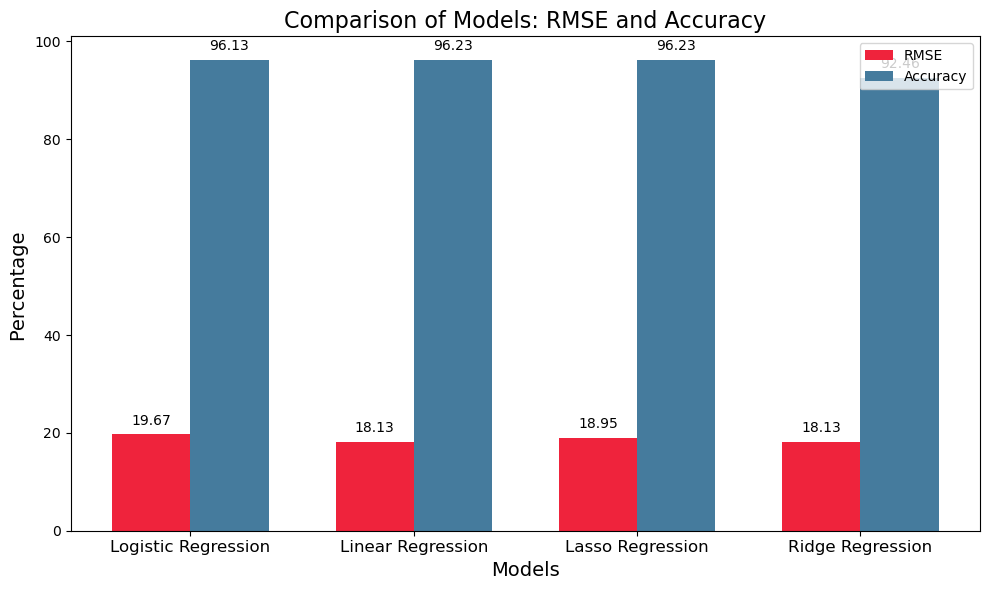

In [396]:
import matplotlib.pyplot as plt
import numpy as np

# Example pre-calculated RMSE and Accuracy for each model
models = ['Logistic Regression', 'Linear Regression', 'Lasso Regression', 'Ridge Regression']

# Example RMSE and Accuracy values (replace these with your actual calculated values)
rmse_values = [19.671435554683786
, 18.12776784844222
,18.952674831947895
,18.128190549583962]  # Replace with actual RMSE values
accuracy_values = [96.13034623217924
, 96.23217922606925, 96.23217922606925, 92.4643584521385]  # Replace with actual accuracy values

# Create x-axis positions for each model
x = np.arange(len(models))  # Position of the models on x-axis
width = 0.35  # Width of the bars for grouped bar chart

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for RMSE and Accuracy
bar1 = ax.bar(x - width/2, rmse_values, width, label='RMSE', color='#ef233c')
bar2 = ax.bar(x + width/2, accuracy_values, width, label='Accuracy', color='#457b9d')

# Add text labels on the bars
ax.bar_label(bar1, fmt='%.2f', padding=5)
ax.bar_label(bar2, fmt='%.2f', padding=5)

# Set the labels and title
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Percentage ', fontsize=14)
ax.set_title('Comparison of Models: RMSE and Accuracy', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

<h3><span style="color: #457b9d; font-size: 22px;"><b><u>Observations</u></b></span></h3>
<span style="font-size: 15px;">

#### 1. **RMSE**:
- **Linear** and **Ridge** models have the lowest RMSE (around **18.13**), indicating the smallest prediction errors and the most accurate predictions among the models tested.
- **Lasso** has a slightly higher RMSE (**18.95**), suggesting it has marginally higher prediction errors compared to Linear and Ridge models.
- **Logistic Regression** has the highest RMSE (**19.67**), which suggests it performs worse than the other regression models in terms of prediction accuracy for continuous outcomes.

#### 2. **Accuracy**:
- **Accuracy** is very high across all models: **96.23%** for **Linear** and **Lasso**, and **92.46%** for **Ridge**. 
- **Logistic Regression** also has high accuracy (**96.13%**), though slightly lower than Linear and Lasso.
- Despite similar accuracies, the performance of these models differs significantly when evaluated with RMSE, as the models that perform better in RMSE (Linear and Ridge) are more suitable for regression tasks.

#### Conclusion:
- **RMSE** is a more relevant metric for regression tasks and shows that **Linear** and **Ridge** regression models perform the best.
- **Accuracy**, while still important, does not give a full picture of model performance, especially for regression problems where prediction errors are key.
</span>


<h3><span style="color: #e63946; font-size: 21px;"><b>Why do all models have similiar accuracies?</b></span></h3>

<span style="font-size: 15px;">

1. **Strong Predictive Features**
   - Certain features like age, glucose level, and BMI are likely to have a strong correlation with the target variable (`stroke`).
   - These dominant features lead all models to converge on similar predictions.

2. **Linearity in Relationships**
   - If the relationships between independent variables and the target variable are predominantly linear, models like Linear Regression, Ridge, and Lasso perform similarly.
   - Logistic Regression, although classification-based, may achieve comparable accuracy in binary target prediction due to linear separability.

3. **Feature Redundancy**
   - Some features might be redundant or highly correlated with each other, leading all models to utilize nearly the same information for predictions.

4. **Balanced Target Distribution**
   - If the dataset has a balanced distribution of the target variable (`stroke`), all models can perform well without biasing toward a specific class.

5. **Low Noise Levels**
   - The dataset appears to be well-preprocessed with minimal noise, making all models behave predictably without any model needing to handle irregularities differently.


6. **Feature Encoding Consistency**
   - Properly encoded features ensure that no model gains an advantage due to input format, leading to similar outcomes.

7. **Evaluation Metric**
    - The use of accuracy and RMSE as evaluation metrics focuses on overall performance rather than nuanced model behavior, potentially masking minor differences.
    </span>


<h3 style="color: #e63946; text-align: center;"><b><u>Precision, Recall, F1 Score, and Accuracy Score</u></b></h3>


##### **Introduction**

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positive observations.
- **Recall** is the ratio of correctly predicted positive observations to all observations in the actual class.
- **F1 Score** is the weighted average of Precision and Recall.

---

##### **Mathematical Explanation**

##### <u><span style="color:#457b9d;">**Confusion Matrix**</span></u>
The confusion matrix helps to understand the classification performance by summarizing the true and false positive/negative predictions:
1. **True Positives (TP)**: Correctly predicted "Stroke" cases.
2. **True Negatives (TN)**: Correctly predicted "No Stroke" cases.
3. **False Positives (FP)**: Incorrectly predicted "Stroke" cases (actually "No Stroke").
4. **False Negatives (FN)**: Missed "Stroke" cases (predicted as "No Stroke"). <br>
  
 <img src="conn.png" alt="confusion matrix" width="450" height="400">



---

##### <u><span style="color:#457b9d;">**Metrics Formulas**</span></u>

1. **Precision (P)**: Measures how many predicted "Stroke" cases are correct.  
   Formula:  

   ![Precision Formula](eqp.png)

2. **Recall (R)**: Measures how many actual "Stroke" cases are correctly identified.  
   Formula:  
   
   ![Recall Formula](eqrr.png)

3. **F1 Score**: Harmonic mean of Precision and Recall, providing a balance between both.  
   Formula:  
   
   ![F1 Score Formula](eqf.png)

4. **Accuracy**: Overall correctness of the predictions.  
   Formula:  
   ![Accuracy Formula](eqa.png)

---


<h5><span style="color: #e63946";"><b>(1a) Precision, Recall, F1 Score, and Accuracy Score for Ridge Regression Model:</b></span></h5>

In [397]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate metrics
precision = precision_score(y_test, y_pred_classr)
recall = recall_score(y_test, y_pred_classr)
f1 = f1_score(y_test, y_pred_classr)
accuracy = accuracy_score(y_test, y_pred_classr)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.25333333333333335
Recall: 0.5135135135135135
F1 Score: 0.3392857142857143
Accuracy: 0.924643584521385


<h5><span style="color: #e63946";"><b>(1b) Confusion Matrix:</b></span></h5>

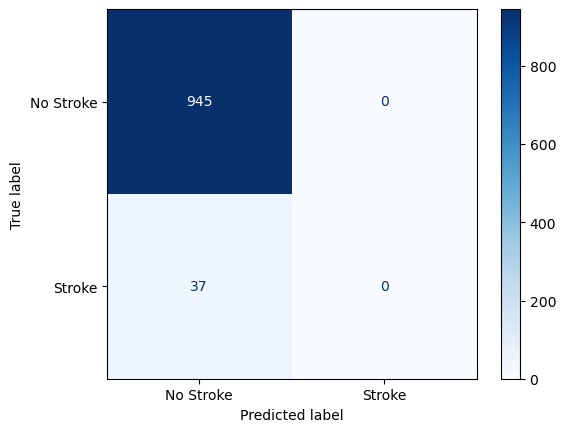

In [398]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #e63946";"><b>(2a) Precision, Recall, F1 Score, and Accuracy Score for Linear Regression Model:</b></span></h5>

In [399]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Convert the continuous predictions into binary predictions
y_pred_class = (linear_reg_predictions >= 0.23).astype(int)

# Calculate the evaluation metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.3333333333333333
Recall: 0.05405405405405406
F1 Score: 0.09302325581395349
Accuracy: 0.960285132382892


<h5><span style="color: #e63946";"><b>(2b) Confusion Matrix:</b></span></h5>

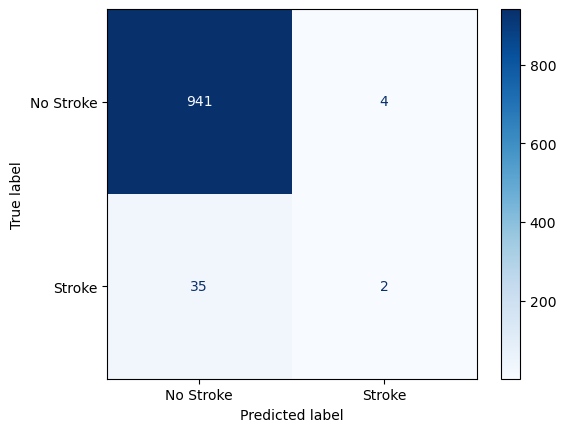

In [400]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #e63946";"><b>(3a) Precision, Recall, F1 Score, and Accuracy Score for Lasso Regression Model:</b></span></h5>

In [401]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Convert continuous predictions from Lasso Regression into binary predictions
y_pred_class = (lasso_reg_predictions >= 0.05).astype(int)  # Apply threshold to convert to binary

# Calculate metrics
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)






Precision: 0.19767441860465115
Recall: 0.4594594594594595
F1 Score: 0.2764227642276423
Accuracy: 0.9093686354378818


<h5><span style="color: #e63946";"><b>(3b) Confusion Matrix:</b></span></h5>

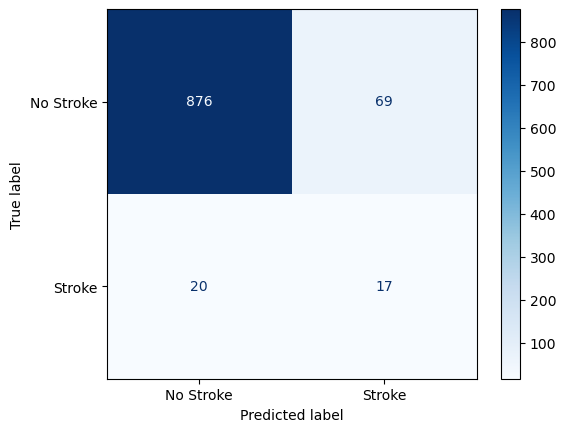

In [402]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #e63946";"><b>(4a) Precision, Recall, F1 Score, and Accuracy Score for Logistic Regression Model:</b></span></h5>

In [403]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Convert continuous predictions into binary predictions
y_pred_class = ( logistic_reg_predictions>= 0.2).astype(int)  # Convert continuous predictions to binary (0 or 1)

# Calculate metrics
y_pred_class=logistic_reg_predictions
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.3333333333333333
Recall: 0.02702702702702703
F1 Score: 0.05
Accuracy: 0.9613034623217923


<h5><span style="color: #e63946";"><b>(4b) Confusion Matrix:</b></span></h5>

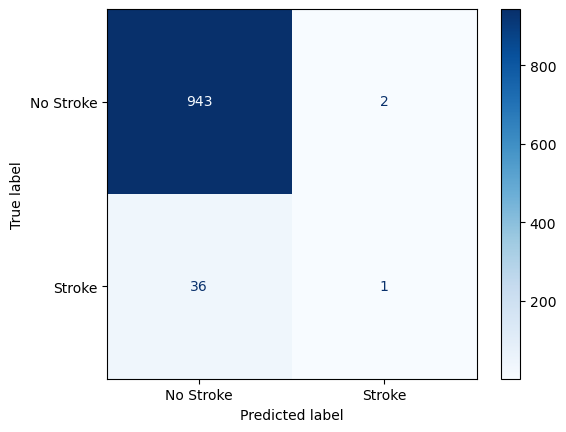

In [404]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Stroke", "Stroke"])
disp.plot(cmap='Blues')

<h5><span style="color: #e63946";"><b> Precision Recall Curve (Ridge Regression Model)</b></span></h5>

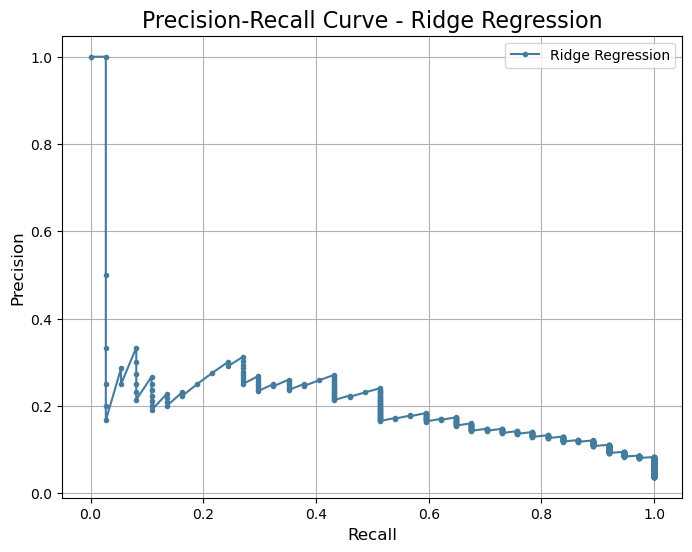

In [405]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


# Predict on the test set using the trained ridge model
y_pred_prob = ridge_model.predict(X_test_scaled)  # Get continuous predictions

# Calculate precision and recall for Ridge regression
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='#457b9d', label='Ridge Regression')
plt.title('Precision-Recall Curve - Ridge Regression', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


<h3><span style="color: #457b9d; font-size: 22px;"><b><u>Observations</u></b></span></h3>

<span style="font-size: 16px; ">
  
#####  <span style="color: #e63946;">1.Ridge Regression</span>
- ***Precision***: 0.2533  
  Indicates that out of all positive predictions, 25.33% were correct.  
- ***Recall***: 0.5135  
  Captures 51.35% of the actual positive cases, showing a moderate ability to identify true positives.  
- ***F1 Score***: 0.3393  
  A balance between precision and recall, showing moderate performance in identifying positive cases.  
- ***Accuracy***: 92.46%  
  Indicates the overall correct predictions, slightly lower than Linear and Logistic regression.  

<hr style="border: 1px solid #457b9d; background-color: #457b9d;">

#####  <span style="color: #e63946;">2.Linear Regression</span>
- ***Precision***: 0.3333  
  33.33% of positive predictions were correct, higher than Ridge.  
- ***Recall***: 0.0541  
  A very low recall, capturing only 5.41% of the actual positive cases, suggesting poor identification of true positives.  
- ***F1 Score***: 0.0930  
  A low balance between precision and recall.  
- ***Accuracy***: 96.03%  
  High overall correct predictions, but low recall affects its performance for minority class detection.  

<hr style="border: 1px solid #457b9d; background-color: #457b9d;">

#####  <span style="color: #e63946;">3.Lasso Regression</span>
- ***Precision***: 0.1977  
  Indicates that 19.77% of positive predictions were correct, which is lower than Linear Regression.  
- ***Recall***: 0.4595  
  Captures 45.95% of the actual positive cases, showing a moderate ability to identify true positives.  
- ***F1 Score***: 0.2764  
  A moderate balance between precision and recall, showing that the model's performance is not optimal but still reasonable.  
- ***Accuracy***: 90.94%  
  Slightly lower than Ridge and Linear Regression in terms of overall accuracy, but performs better than expected in identifying positive cases.  

<hr style="border: 1px solid #457b9d; background-color: #457b9d;">

#####  <span style="color: #e63946;">4.Logistic Regression</span>
- ***Precision***: 0.3333  
  Similar to Linear and Lasso Regression.  
- ***Recall***: 0.0270  
  Matches Lasso Regression with extremely low recall.  
- ***F1 Score***: 0.0500  
  Poor performance due to low recall.  
- ***Accuracy***: 96.13%  
  High overall correct predictions, but poor identification of the minority class.  
<hr style="border: 1px solid #457b9d; background-color: #457b9d;">

</span>


### <u>Conclusion</u>:

- **<span style="color: #457b9d;">Ridge Regression</span>** provides the most balanced performance overall with the highest recall among the models, although its precision could be improved.

- Linear Regression has good overall accuracy but poor recall, indicating that it struggles with identifying the minority class.

- Lasso Regression has the best recall, but its low precision means it incorrectly predicts many positive cases.

- Logistic Regression has high accuracy but is ineffective at identifying positive cases, as evidenced by its low recall and F1 score.



 <h3><span style="color: #457b9d;"><b>(Q) Is accuracy a factor for model performance?</b></span></h3>

Accuracy alone is not a reliable metric for evaluating model performance, especially in cases of class imbalance. While high accuracy values (e.g., Logistic Regression: 96.13%, Linear Regression: 96.02%) might seem impressive, they can be misleading when the minority class is poorly identified.

For instance:

Ridge Regression, despite having lower accuracy (92.46%), achieves the highest recall (51.35%), making it more effective at detecting the minority class.
Logistic Regression has the highest accuracy (96.13%) but extremely low recall (2.7%), failing to identify most minority cases.
In imbalanced datasets, metrics like

 <h3><span style="color: #457b9d;"><b>(Q) Is the dataset biased ?</b></span></h3>

From the class distribution output:



In [406]:
s=df['stroke'].value_counts(normalize=True)
print (s)

stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64


We observe the following distribution of the target variable stroke:

- Class 0 (No Stroke): 95.74% of the data
- Class 1 (Stroke): 4.26% of the data
This indicates that the dataset is highly imbalanced, as Class 0 (No Stroke) vastly outweighs Class 1 (Stroke). <br>

<u>Why is this a Problem?</u><br>
- Model Bias: A highly imbalanced dataset can cause the model to be biased towards the majority class (Class 0 in this case). The model might predict Class 0 most of the time because it's the dominant class, which leads to high accuracy but poor performance for the minority class (Class 1).
- Low Recall for Minority Class: Since the model will often predict the majority class, it might fail to detect the minority class (Stroke). This results in low recall for Class 1, meaning the model misses many actual positive cases (strokes).

<u>Steps to mitigate bias</u> <br>
- Changing random state
- Threshold tuning
- Adjusting class weights
- Resampling

<u>Visual Inspection</u>

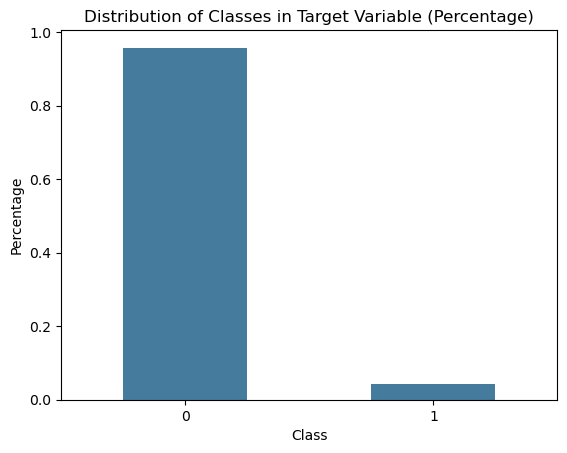

In [407]:
import matplotlib.pyplot as plt

# Assuming 's' refers to the target variable column
s = df['stroke']  # Replace 'stroke' with the actual column name if needed

# Plotting the percentage distribution of the target variable
s.value_counts(normalize=True).plot(kind='bar', color='#457b9d')
plt.title("Distribution of Classes in Target Variable (Percentage)")
plt.xlabel("Class")
plt.ylabel("Percentage")
plt.xticks(rotation=0)  # Keeps the class labels horizontal
plt.show()



 <h3><span style="color: #457b9d;"><b><u>Ridge Regression Performance</u></b></span></h3>

<div style="border: 2px solid #457b9d; padding: 10px; border-radius: 10px; box-sizing: border-box; width: 50%; margin: 0 auto;">
    <h6 style="font-size: 16px; text-align: center;">
        <b><u>Metrics:</u></b><br><br>
         <b>Precision</b>: 0.2533<br>
         <b>Recall</b>: 0.5135<br>
         <b>F1 Score</b>: 0.3393<br>
         <b>Accuracy</b>: 92.46%
    </h6>
</div>



<div style="font-size: 16px;">
    <h5><span style="color: #e63946;">Strengths:</h5></span>
    <ul>
        <li><b>Recall (51.35%)</b>: Ridge captures a significant portion of the positive cases, making it effective at identifying true positives.</li>
        <li><b>Accuracy (92.46%)</b>: Overall, the model performs well in terms of correct predictions.</li>
    </ul>
    
<h5><span style="color: #e63946;">Weakness:</h5></span>
    <ul>
        <li><b>Precision (0.2533)</b>: Many of Ridge's positive predictions are false positives, leading to low precision.</li>
        <li><b>F1 Score (0.3393)</b>: The low precision affects the F1 score, indicating a need for improvement in balancing precision and recall.</li>
    </ul>

<h5><span style="color: #e63946;">Conclusion</h5></span>
    Ridge Regression performs well in identifying positive cases (high recall) but struggles with false positives (low precision), leading to a lower F1 score. 
</div>


# **(6)  Key Insights of the project**
***

1.<b>Class Imbalance</b>: The dataset has a significant imbalance, with 95% of cases being "No Stroke" and only 5% being "Stroke." This causes the model to be biased towards predicting the majority class.

2.<b>Impact on Model Performance</b>: Due to the imbalance, the model may achieve high accuracy by simply predicting the majority class, which leads to poor performance in detecting the minority class ("Stroke").

3.<b>Evaluation Considerations</b>: The imbalance in the dataset makes accuracy an unreliable metric for model evaluation. It’s important to focus on metrics like recall and F1-score, especially for detecting the minority class.

# **(7)  Streamlit and the Stroke Prediction App**
***


Streamlit is a Python framework that allows you to quickly build and deploy interactive web apps. In this app, Streamlit is used to create an interface where users can input their health data (age, gender, blood pressure, etc.) and receive stroke risk predictions from a machine learning model.

The app features:

- Interactive input forms for health data.
- Real-time stroke predictions based on the provided data.
- Easy-to-use design for healthcare professionals and users.

Streamlit enables fast development and sharing of the stroke prediction tool. Below is the image of my Streamlit App


![Streamlit](stream.png)

It displays the prediction after the user provides the input and clicks the button.

No Stroke

![No Stroke](predicty.png)

Stroke Detected

![Stroke](predictn.png)